# 5강 - 실전예제1 - 광고캠페인 전환율 및 성과 분석하기

## 작성자 : AISchool (http://aischool.ai/)

**Data source** : https://www.kaggle.com/loveall/clicks-conversion-tracking

**Reference** : https://www.kaggle.com/mansimeena/facebook-ad-campaigns-analysis-sales-prediction

**데이터 설명:**

이 프로젝트에서 사용하는 데이터는 익명화된 어떤 회사의 소셜 미디어(Facebook) 광고 집행 결과에 대한 데이터입니다.

각 데이터의 컬럼이 의미하는 바는 다음과 같습니다.

1. **ad_id** : 각각의 광고에 대한 고유한(unique)한 ID입니다.
2. **xyzcampaignid** : XYZ 회사에서 부여한 각 AD의 캠페인 ID
3. **fbcampaignid** : Facebook에서 부여한 각 AD의 캠페인 ID
4. **age** : 각 AD가 노출된 사용자의 나이
5. **gender** : 각 AD가 노출된 사용자의 성별
6. **interest** : 사용자의 Facebook 공개프로필에 기반해서 파악한 사용자의 관심사 code
7. **Impressions** : 광고가 노출된 횟수
8. **Clicks** : 광고가 클릭된 횟수
9. **Spent** : xyz가 해당 AD에 Facebook에 지출한 비용(paid)
10. **Total conversion** : 광고를 본 후에 제품에 문의를 준 사람의 수
11. **Approved conversion** : 광고를 본 후에 제품을 실제로 구매한 사람의 수

## 데이터 분석의 목표

전환율(Conversion) 분석

# 라이브러리 import

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plt.rcParams['font.family'] = 'NanumGothic' # 윈도우(Windwos) 사용자
plt.rcParams['font.family'] = 'AppleGothic' # 맥(Mac) 사용자

# 데이터 불러오기

In [5]:
df = pd.read_csv("./KAG_conversion_data.csv")

In [6]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


**null값이 있는지 확인하기**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


# EDA(Exploratory Data Analysis)로 데이터 분석하기

In [8]:
df.shape

(1143, 11)

In [9]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


# Correlation Matrix로 상관분석해보기

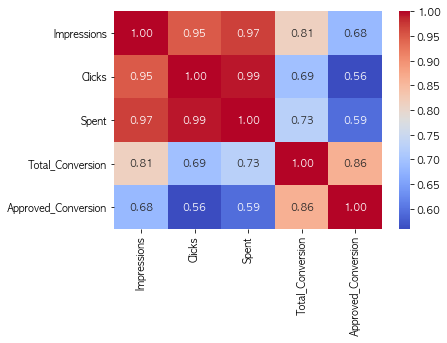

In [10]:
g = sns.heatmap(df[["Impressions","Clicks","Spent","Total_Conversion","Approved_Conversion"]].corr(),
              annot = True,
              fmt = ".2f",
              cmap = "coolwarm")

# 각 Feature와 Approved_Conversion간의 연관관계 분석해보기

> regplot을 이용해서 각 Feature들과 Approved_Conversion간의 연관관계를 분석해봅시다.

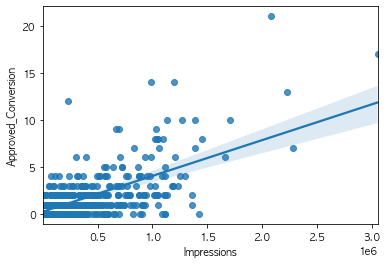

In [11]:
sns.regplot(data=df, x="Impressions", y="Approved_Conversion");

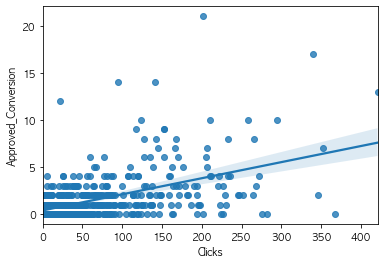

In [12]:
sns.regplot(data=df, x="Clicks", y="Approved_Conversion");

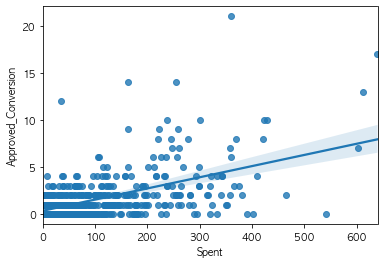

In [13]:
sns.regplot(data=df, x="Spent", y="Approved_Conversion");

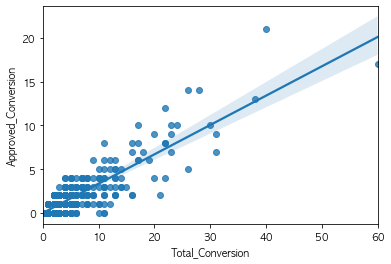

In [14]:
sns.regplot(data=df, x="Total_Conversion", y="Approved_Conversion");

# 캠페인 분석

In [15]:
# unique한 campaign id를 얻기
df["xyz_campaign_id"].unique()

array([ 916,  936, 1178])

## xyz 회사를 위한 3개의 다른 광고 캠페인이 있습니다. 각 캠페인을 직관적으로 이해하기 위해서 "campaignA", "campaignB", "campaignC"라는 이름을 붙여줍니다.

In [16]:
df["xyz_campaign_id"].replace({916:"campaignA",936:"campaignB",1178:"campaignC"}, inplace=True)

In [17]:
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,campaignA,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,campaignA,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,campaignA,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,campaignA,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,campaignA,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,campaignC,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,campaignC,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,campaignC,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,campaignC,179981,45-49,F,113,790253,135,198.710001,8,2


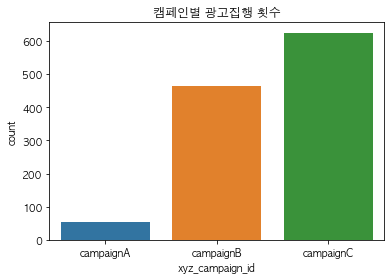

In [18]:
# 캠페인별 광고 집행 개수를 출력해봅니다.
sns.countplot(x ='xyz_campaign_id', data = df)
plt.title('캠페인별 광고집행 횟수')
plt.show()

## "campaignC"가 가장 많은 광고 집행횟수를 가지고 있는 모습을 볼 수 있습니다.

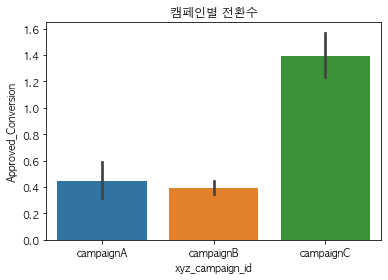

In [19]:
# 캠페인별 Approved_Conversion 개수를 출력해봅니다.
sns.barplot(x = df["xyz_campaign_id"], y = df["Approved_Conversion"])
plt.title("캠페인별 전환수")
plt.show()

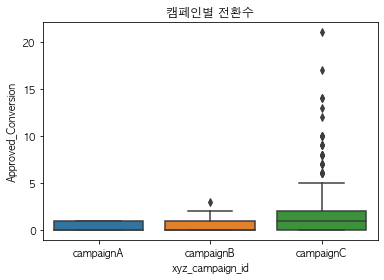

In [20]:
# 캠페인별 Approved_Conversion 개수를 출력해봅니다.
sns.boxplot(x = df["xyz_campaign_id"], y = df["Approved_Conversion"])
plt.title("캠페인별 전환수")
plt.show()

## "campaignC"가 가장 많은 Approved_Conversion(=실제 구매 횟수)를 가지고 있는 모습을 볼 수 있습니다.

# 나이를 기준으로 살펴보기

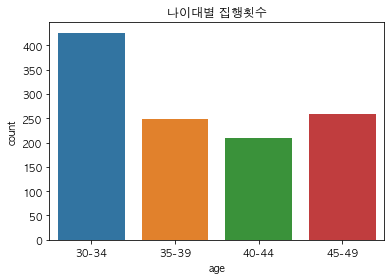

In [21]:
# 나이를 기준으로한 집행 횟수를 그래프로 표현해봅니다. 
sns.countplot(x ='age', data = df) 
plt.title('나이대별 집행횟수')
plt.show() 

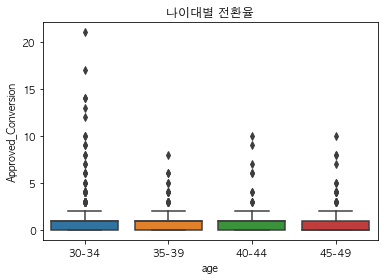

In [22]:
sns.boxplot(x = df['age'], y = df['Approved_Conversion'])
plt.title('나이대별 전환율')
plt.show()

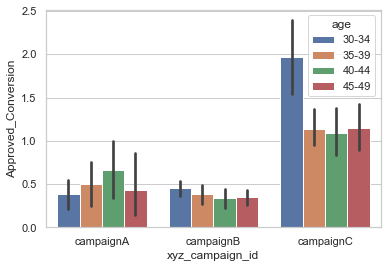

In [23]:
sns.set(style="whitegrid")
sns.barplot(x = df["xyz_campaign_id"], y = df["Approved_Conversion"], hue=df["age"])
plt.show()

## campaignB와 campaignC는 30-34세의 사람이 가장 큰 전환을 보이고, campaignA는 40-44세의 사람이 가장 큰 전환을 보이는 모습을 볼 수 있습니다.

# 성별로 분석해보기

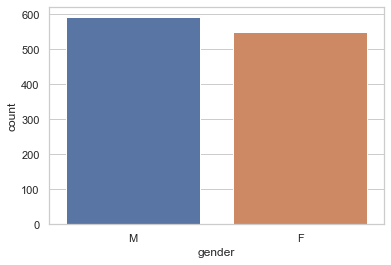

In [24]:
# 성별별 광고 집행횟수 살펴보기
sns.countplot(x ='gender', data = df) 
plt.show() 

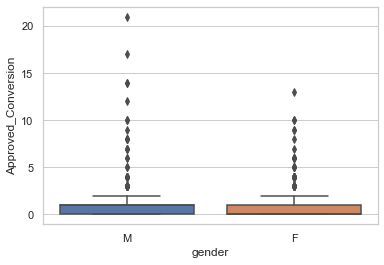

In [25]:
sns.boxplot(x=df['gender'], y=df['Approved_Conversion'])
plt.show()

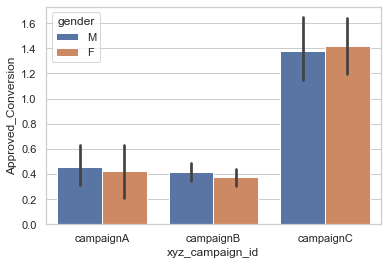

In [26]:
sns.set(style="whitegrid")
sns.barplot(x = df["xyz_campaign_id"], y = df["Approved_Conversion"], hue=df["gender"])
plt.show()

## 캠페인별로 남자와 여자 모두 비슷한 관심을 보이는 모습을 볼 수 있습니다.

# 관심(Interest)로 분석해보기

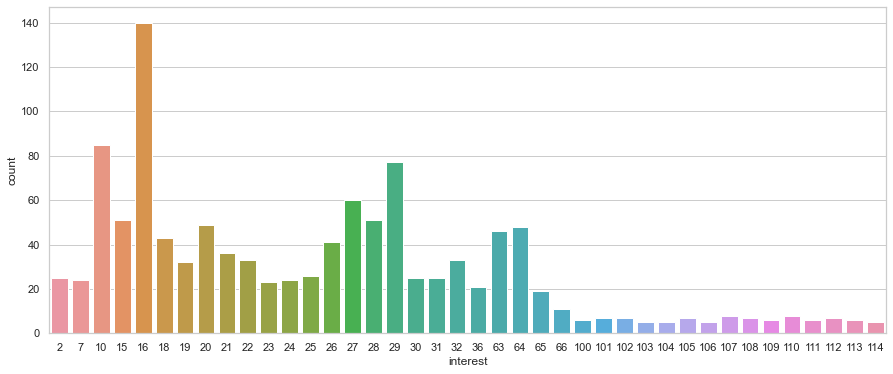

In [27]:
# 관심사별 광고 노출 횟수 그려보기
fig_dims = (15,6)
fig, ax = plt.subplots(figsize = fig_dims)
sns.countplot(x ='interest', data = df) 
plt.show() 

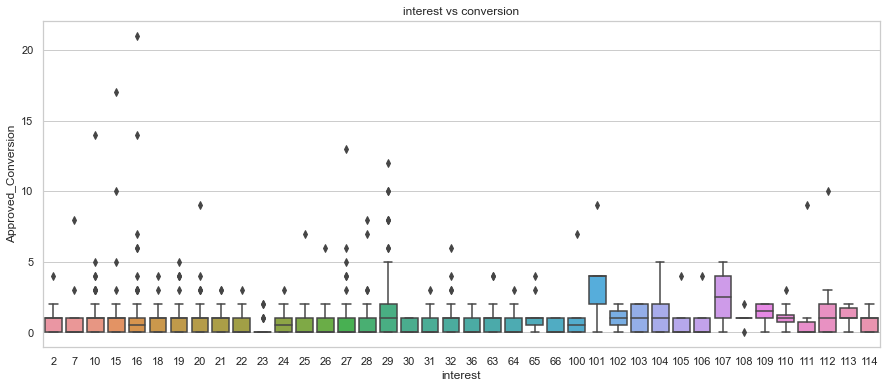

In [28]:
fig_dims = (15,6)
fig, ax = plt.subplots(figsize = fig_dims)
sns.boxplot(x=df['interest'], y=df['Approved_Conversion']);
plt.title("interest vs conversion")
plt.show()

In [29]:
df.query('interest > 100')['Approved_Conversion'].mean()

1.5280898876404494

In [30]:
df.query('interest < 100')['Approved_Conversion'].mean()

0.8912213740458015

## interst > 100 의 광고 노출횟수는 적지만 평균적인 Approved_Conversion은 더높은 모습을 볼 수 있습니다.

# 광고비 지출(Spent) 분석해보기

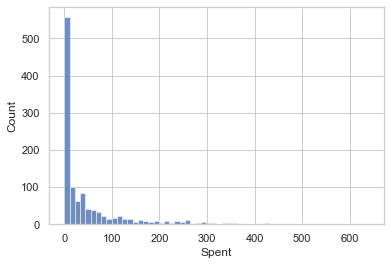

In [31]:
sns.histplot(data=df, x='Spent', alpha=0.8);

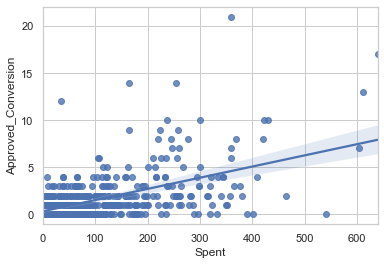

In [32]:
sns.regplot(data=df, x="Spent", y="Approved_Conversion");

## 광고비 증가와 Approved_Convesrion 증가와 큰 연관관계가 없다는 사실을 알 수 있습니다.

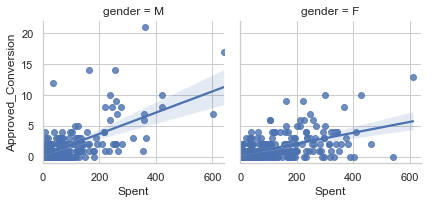

In [33]:
g = sns.FacetGrid(df, col="gender")
g.map(sns.regplot, "Spent", "Approved_Conversion")
g.add_legend();

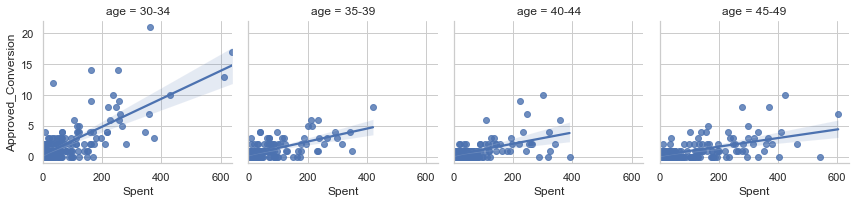

In [34]:
g = sns.FacetGrid(df, col="age")
g.map(sns.regplot, "Spent", "Approved_Conversion")
g.add_legend();

## 노출(Impressions) 분석해보기

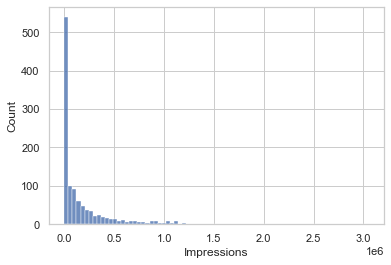

In [35]:
sns.histplot(data=df, x='Impressions', alpha=0.8);

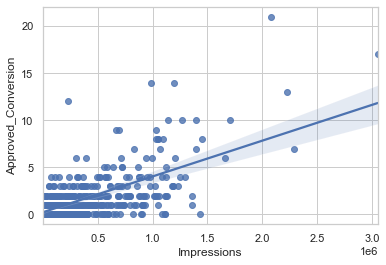

In [36]:
sns.regplot(data=df, x="Impressions", y="Approved_Conversion");

## 노출(Impression)이 특정 값을 넘으면 Approved_conversion이 증가하는 모습을 볼 수 있습니다.

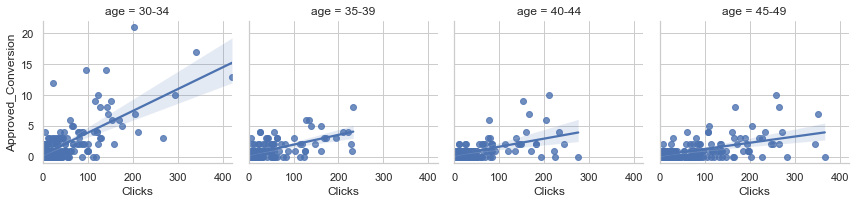

In [37]:
g = sns.FacetGrid(df, col="age")
g.map(sns.regplot, "Clicks", "Approved_Conversion")
g.add_legend();

## 30-34세의 사람들이 클릭후 실제 구매를 하는 비율이 더높음을 볼 수 있습니다.

# 제품 문의 후에 누가 실제로 구매를 하는지를 살펴봅시다.

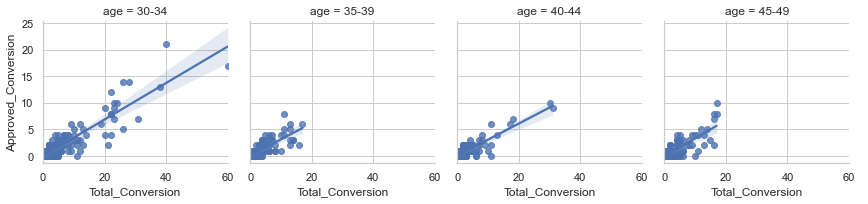

In [38]:
g = sns.FacetGrid(df, col="age")
g.map(sns.regplot, "Total_Conversion", "Approved_Conversion")
g.add_legend()

## 30-34세 사람들이 문의후 실제로 구매한 비율이 높음을 알 수 있습니다.

# campaignC 더욱 깊게 살펴보기 (가장 많은 실제 구매를 이끌어낸 캠페인)

In [39]:
campaign_c = df[df['xyz_campaign_id']=='campaignC'] # df.query('xyz_campaign_id == "campaignC"')
campaign_c.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
518,1121091,campaignC,144531,30-34,M,10,1194718,141,254.049996,28,14
519,1121092,campaignC,144531,30-34,M,10,637648,67,122.400000,13,5
520,1121094,campaignC,144531,30-34,M,10,24362,0,0.000000,1,1
521,1121095,campaignC,144531,30-34,M,10,459690,50,86.330001,5,2
522,1121096,campaignC,144531,30-34,M,10,750060,86,161.909999,11,2


## fb_campaign_id와 campaign_c별로 Approved_Conversion을 살펴봅시다.

In [40]:
campaign_c["fb_campaign_id"].unique()

array([144531, 144532, 144533, 144534, 144535, 144536, 144537, 144538,
       144539, 144541, 144545, 144547, 144549, 144552, 144554, 144556,
       144558, 144561, 144562, 144565, 144567, 144568, 144569, 144570,
       144571, 144572, 144573, 144574, 144575, 144576, 144577, 144578,
       144579, 144580, 144581, 144582, 144583, 144584, 144585, 144586,
       144587, 144588, 144589, 144590, 144591, 144592, 144593, 144594,
       144595, 144596, 144597, 144598, 144599, 144601, 144602, 144603,
       144604, 144605, 144606, 144607, 144608, 144609, 144611, 144612,
       144613, 144614, 144615, 144616, 144617, 144618, 144619, 144620,
       144621, 144622, 144623, 144624, 144625, 144626, 144627, 144628,
       144629, 144630, 144631, 144632, 144633, 144634, 144635, 144636,
       144638, 144639, 144640, 144641, 144642, 144643, 144644, 144646,
       144647, 144648, 144649, 144650, 144651, 144652, 144653, 144654,
       144655, 144656, 144657, 144658, 144659, 144660, 144661, 144662,
      

<AxesSubplot:xlabel='fb_campaign_id', ylabel='Approved_Conversion'>

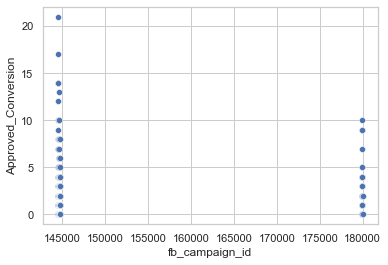

In [41]:
sns.scatterplot(data=campaign_c, x="fb_campaign_id", y="Approved_Conversion")

In [42]:
campaign_c.query('fb_campaign_id > 143000 and fb_campaign_id < 147000')['Approved_Conversion'].mean()

1.3716981132075472

In [43]:
campaign_c.query('fb_campaign_id > 143000 and fb_campaign_id < 147000')['Approved_Conversion'].max()

21

In [44]:
campaign_c.query('fb_campaign_id > 170000 and fb_campaign_id < 180000')['Approved_Conversion'].mean()

1.5263157894736843

In [45]:
campaign_c.query('fb_campaign_id > 170000 and fb_campaign_id < 180000')['Approved_Conversion'].max()

10

## campaignC와 180000 근처의 fb_campaign_id 결합이 145000 근처의 fb_campaign_id 결합보다 더욱 많은 구매를 이끌어내는 모습을 볼 수 있습니다. 

# 요약정리

**CampaignC:**

1. CampaignC가 가장 많은 노출 횟수를 가지고 있습니다.
2. CampaignC가 가장 많은 Approved_conversion 횟수를 가지고 있습니다.

**age_group:**

3. CampaignC와 CampaignB는 30~34세가 가장 많은 관심을 보였습니다. 반면에 CampaignA는 40-44세가 가장 많은 관심을 보였습니다.

**gender:**

4. 성별에 따른 캠페인에 대한 관심 차이는 크지 않았습니다.

**interest:**

5. 100이상의 interest를 가진 그룹에서 실제 구매가 많이 이루어졌습니다.

**money spent:**

6. 비용 사용이 늘어날수록 실제 구매가 많이 이루어졌습니다.
7. 일정 노출 횟수이상에서 Approved_Conversion이 갑자기 증가하였습니다.

#### 유익한 결론

8. CampaignC에서 180000 근처의 fb_campaign_ids를 가진 페이스북 광고는 145000 근처의 fb_campaign_ids를 가진 페이스북 광고보다 더욱 높은Approved_Conversion를 보여줍니다.

# 연습문제 1 - 비즈니스 의사결정에 도움을 줄 수 있을만한 다음 질문들에 답을 작성해봅시다.

1. 가장 많은 전환율을 이끌어낼 수 있는 캠페인 전략은 무엇인가요?
    - 노출 횟수가 많을 수록 전환율이 높다.
    - interest 100 이상의 고객을 타겟팅 한다.
    - 일정 노출 횟수이상에서 갑자기 증가하므로 이 정도까지 비용 사용 늘리자.(너무 많은 투자는 낭비가 될 수 있음)
    - 많은 관심을 보이는 연령대에 노출을 많이 늘리자.
2. 구매를 이끌어 내기 위한 최적의 인구분포(나이, 성별)은 어떻게 되나요?
    - 성별은 차이가 없음
    - B,C는 30~34세를 타게팅하고 A는 40~44세를 타게팅하자.
3. campaignA, campaignB의 성과도 위에서 해본 campaignC처럼 쪼개서 분석해봅시다.

# Campain A 살펴보기

In [46]:
campaign_a = df[df['xyz_campaign_id']=='campaignA'] # df.query('xyz_campaign_id == "campaignC"')
campaign_a.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,campaignA,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,campaignA,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,campaignA,103920,30-34,M,20,693,0,0.00,1,0
3,708815,campaignA,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,campaignA,103928,30-34,M,28,4133,1,1.29,1,1


## fb_campaign_id와 campaign_a별로 Approved_Conversion을 살펴봅시다.

In [47]:
campaign_a["fb_campaign_id"].unique()

array([103916, 103917, 103920, 103928, 103929, 103940, 103941, 103951,
       103952, 103955, 103962, 103965, 103968, 103976, 103978, 103979,
       103988, 103989, 104012, 104013, 104034, 104049, 104061, 104085,
       104108, 104109, 104133, 104140, 104185, 104205, 104220, 104228,
       104229, 104230, 104239, 104252, 104265, 104270, 104272, 104285,
       104287, 104328, 104396, 104419, 104423, 104438, 104467])

<AxesSubplot:xlabel='fb_campaign_id', ylabel='Approved_Conversion'>

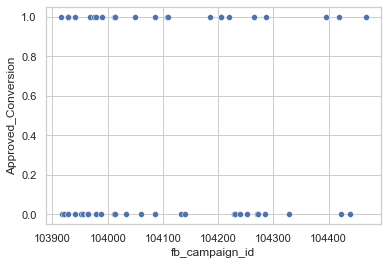

In [48]:
sns.scatterplot(data=campaign_a, x="fb_campaign_id", y="Approved_Conversion")

In [50]:
campaign_a.query('fb_campaign_id > 103000 and fb_campaign_id < 105000')['Approved_Conversion'].mean()

0.4444444444444444

In [52]:
campaign_a.query('fb_campaign_id > 103000 and fb_campaign_id < 105000')['Approved_Conversion'].max()

1

## CampainA의 구매는 전체적으로 분포해 있는 것을 확인 할 수 있다. 특징 없음

# Campain B 살펴보기

In [56]:
campaign_b = df[df['xyz_campaign_id']=='campaignB'] # df.query('xyz_campaign_id == "campaignC"')
campaign_b.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
54,734209,campaignB,108654,30-34,M,10,1772,0,0.00,1,1
55,734210,campaignB,108654,30-34,M,10,13329,4,5.63,1,1
56,734215,campaignB,108655,30-34,M,15,13659,3,3.84,1,0
57,734243,campaignB,108660,30-34,M,21,739,0,0.00,1,1
58,734266,campaignB,108664,30-34,M,25,605,0,0.00,1,0


## fb_campaign_id와 campaign_a별로 Approved_Conversion을 살펴봅시다.

In [57]:
campaign_b["fb_campaign_id"].unique()

array([108654, 108655, 108660, 108664, 108665, 108668, 108672, 108678,
       108680, 108683, 108686, 108689, 108690, 108691, 108692, 108716,
       108720, 108729, 108730, 108740, 108742, 108750, 108752, 108753,
       108761, 108762, 108764, 108766, 108770, 108774, 108776, 108781,
       108786, 108788, 108791, 108792, 108793, 108794, 108797, 108804,
       108809, 108810, 108811, 108817, 108818, 108822, 108823, 108826,
       108827, 108834, 108836, 109448, 109451, 109452, 109470, 109472,
       109473, 109498, 109507, 109553, 109565, 109601, 109629, 109633,
       109637, 109659, 109689, 109698, 109706, 109714, 109717, 109731,
       109738, 109788, 109808, 109813, 109816, 109820, 109826, 109839,
       109844, 109848, 109850, 109851, 109852, 109857, 109859, 110836,
       110837, 110838, 110842, 110856, 110861, 110862, 110867, 110873,
       110874, 110882, 110886, 110908, 110910, 110913, 110914, 110919,
       110932, 110933, 110934, 110938, 110939, 110943, 110944, 110947,
      

<AxesSubplot:xlabel='fb_campaign_id', ylabel='Approved_Conversion'>

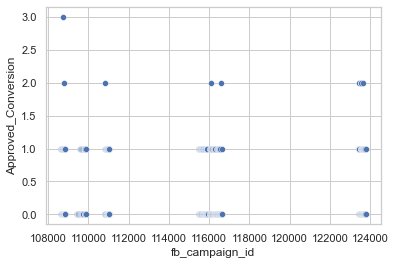

In [58]:
sns.scatterplot(data=campaign_b, x="fb_campaign_id", y="Approved_Conversion")

#### 108000-109000/ 109000-110000 /110000-112000 /115000-118000 /12000-125000

In [60]:
campaign_b.query('fb_campaign_id > 108000 and fb_campaign_id < 109000')['Approved_Conversion'].mean()

0.43103448275862066

In [61]:
campaign_b.query('fb_campaign_id > 108000 and fb_campaign_id < 109000')['Approved_Conversion'].max()

3

In [62]:
campaign_b.query('fb_campaign_id > 109000 and fb_campaign_id < 110000')['Approved_Conversion'].mean()

0.4

In [63]:
campaign_b.query('fb_campaign_id > 109000 and fb_campaign_id < 110000')['Approved_Conversion'].max()

1

In [65]:
campaign_b.query('fb_campaign_id > 110000 and fb_campaign_id < 112000')['Approved_Conversion'].mean()

0.4807692307692308

In [66]:
campaign_b.query('fb_campaign_id > 110000 and fb_campaign_id < 112000')['Approved_Conversion'].max()

2

In [69]:
campaign_b.query('fb_campaign_id > 115000 and fb_campaign_id < 118000')['Approved_Conversion'].mean()

0.34513274336283184

In [70]:
campaign_b.query('fb_campaign_id > 115000 and fb_campaign_id < 118000')['Approved_Conversion'].max()

2

In [71]:
campaign_b.query('fb_campaign_id > 120000 and fb_campaign_id < 125000')['Approved_Conversion'].mean()

0.4431818181818182

In [72]:
campaign_b.query('fb_campaign_id > 120000 and fb_campaign_id < 125000')['Approved_Conversion'].max()

2

## CampaingB 110000 - 112000 fb_campaign 결합이 제일 많은 구매를 이끌어낸다.

# 실전문제 1 - 내가 마케팅 담당자라고 가정하고, 도출한 결론이 잘 드러날수 있도록 다양한 시각화를 통해 리포트를 만들어봅시다.